# Depth-first search (DFS)  
Depth-first search enumerates paths (from the source node) until it finds a solution (target node) prioritizing the deepest (longest) paths and limiting the maximum depth (only finite paths). 

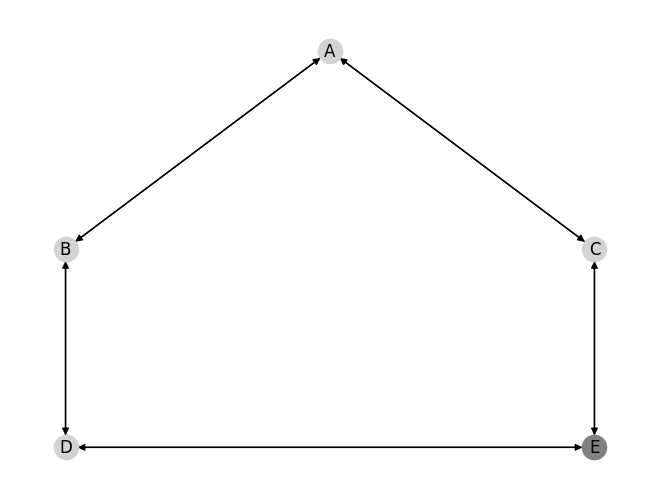

In [1]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
# pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## DFS algorithm with maximum depth m (recursive version - tree search)
DFS(G, s, m)  
> if Target(s) return s  
> if m == 0 return NULL  
> for n $\in$ Adjacents(G, s):  
>>  if (r = DFS(G, n, m-1)) $\neq$ NULL: return r  

> return NULL

### DFS implementation returning the target node that was reached

In [2]:
# G is a graph represented as an adjancency list. 
# source is the label (string) of the source node
# m is the maximum depth
# Target is the list of target nodes
def dfs(G, source, m, Target):
  if source in Target: return source
  if m == 0: return None
  for n in G[source]:
    r = dfs(G,n,m-1,Target)
    if r != None: return r
  return None
      
print(dfs(G,'A',3,Target))

E


### DFS implementation graphically showing the sequence of nodes visited

E


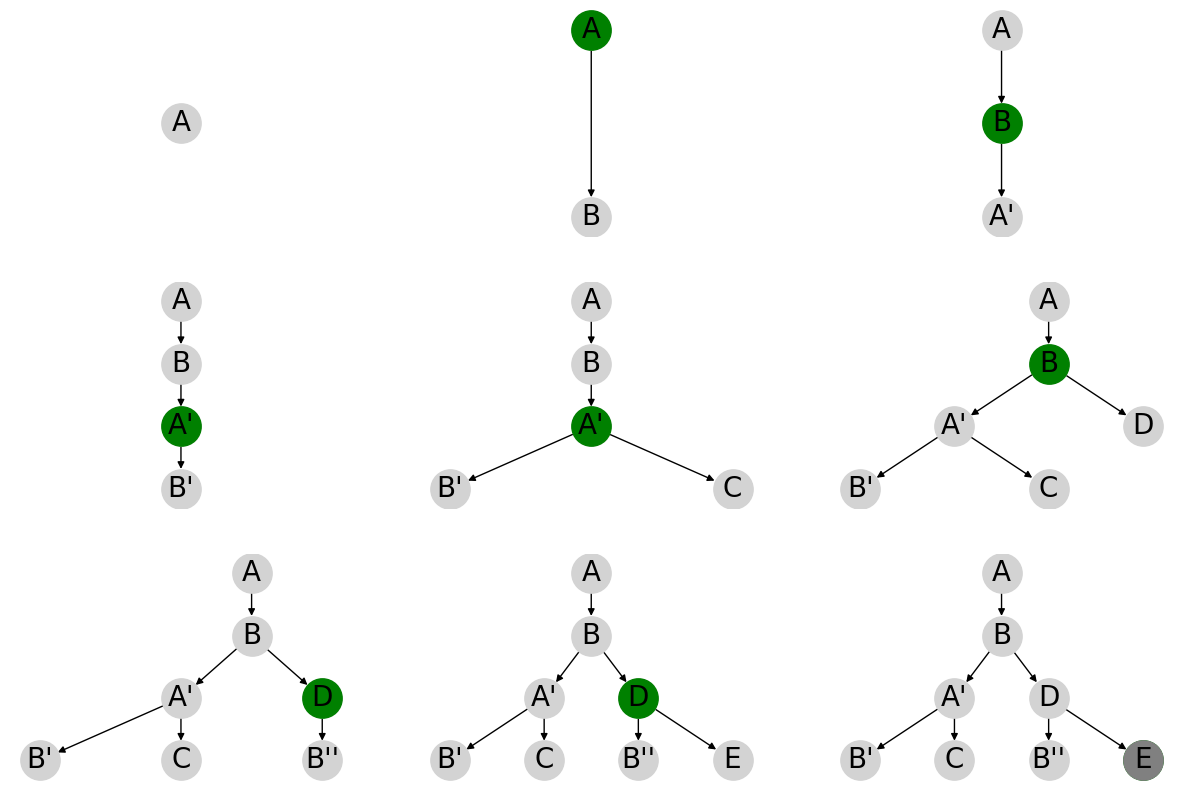

In [3]:
import matplotlib.pyplot as plt

nrows=3; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = iter(fig.axes)

def draw_graph(DG, source, active=[], target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=active, node_color='green', node_size=800)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=target, node_color='gray', node_size=800)

def dfs(G, s, m, Target):
  if s[0] in Target: 
      draw_graph(DG, source, [s], [s])
      return s
  if m == 0: return None
  Adj = DG[s]
  for n in G[s[0]]:
    while n in DG: n+="'"
    Adj.append(n); DG[s]=Adj; DG.update({n:[]})
    draw_graph(DG, source, [s])
    r = dfs(G,n,m-1,Target)
    if r != None: return r
  return None

source = 'A'
DG={source:[]}
draw_graph(DG, source)
print(dfs(G,source,3,Target))


DFS is incomplete and suboptimal  

**Complexity**: G with branching factor $b$ and depth $m$ 
  
  $O(b^m)$ temporal cost and $O(bm)$ spatial cost